<a href="https://colab.research.google.com/github/faruk17035/BloodManagementSystem/blob/master/SHAP_feature_importance_826.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from google.colab import drive 
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [3]:
import pandas as pd
from pandas import read_excel
file_name = '/content/gdrive/MyDrive/Ion-Channel-MSFDPC.xlsx' 
df = pd.read_excel(file_name, index_col=0)
print(df.head()) # print the first 5 rows

            PubchemFP2  PubchemFP3  PubchemFP4  ...    YW    YY  Target
PubchemFP1                                      ...                    
1                    0           0           0  ...  0.00  0.00       1
1                    1           1           1  ...  0.00  0.00       1
1                    1           1           1  ...  0.17  0.17       1
1                    1           1           0  ...  0.21  0.00       1
1                    1           1           0  ...  0.21  0.00       1

[5 rows x 1281 columns]


In [7]:
#Split data into independent (X) and dependent(Y) columns

X = df.iloc[:,0:1280]
y = df.iloc[:,-1].values

In [8]:
y

array([1, 1, 1, ..., 0, 0, 0])

In [9]:
# Split the data
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 0)

In [11]:
# Initiate and fit a Random Forest Regressor 
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split, cross_val_score
rf_reg = RandomForestRegressor(n_estimators=100,random_state=42)
rf_reg.fit(X_train, y_train)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=False,
                      random_state=42, verbose=0, warm_start=False)

In [12]:
rf_train = rf_reg.score(X_train, y_train)
rf_cv = cross_val_score(rf_reg, X_train, y_train, cv=5).mean()
rf_test = rf_reg.score(X_test, y_test)
print('Evaluation of the Random Forest performance\n')
print(f'Training score: {rf_train.round(4)}')
print(f'Cross validation score: {rf_cv.round(4)}')
print(f'Test score: {rf_test.round(4)}')

Evaluation of the Random Forest performance

Training score: 0.9296
Cross validation score: 0.4819
Test score: 0.5797


In [19]:
pip install shap

In [23]:
import shap
import pandas as pd 
from sklearn.datasets import load_boston
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split, cross_val_score

In [25]:
# Create a TreeExplainer and extract shap values from it - will be used for plotting later
explainer = shap.TreeExplainer(rf_reg)
shap_values = explainer.shap_values(X_train)

In [26]:
# shap force plot for the first prediction. Here we want to interpret the output value for the 1st observation in our dataframe.
shap.initjs() 
shap.force_plot(explainer.expected_value, shap_values[0,:], X_train.iloc[0,:])

In [27]:
# SHAP values for all predictions and the direction of their impact
shap.initjs() 
shap.force_plot(explainer.expected_value, shap_values, X_train)

shap.plots.force is slow for many thousands of rows, try subsampling your data.


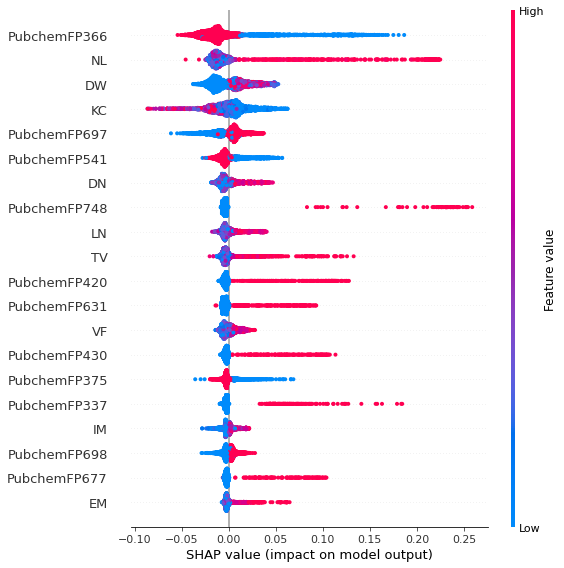

In [28]:
# See the absolute shap value of how each feaure contributes to the model output
shap.initjs() 
shap.summary_plot(shap_values, X_train)

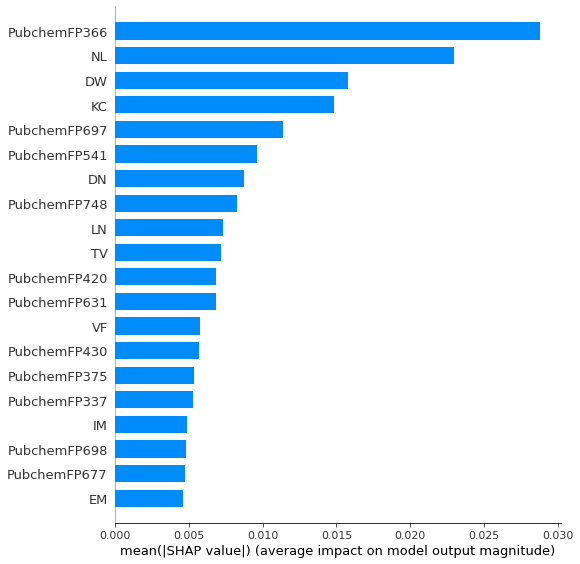

In [29]:
shap.initjs() 
shap.summary_plot(shap_values, X_train, plot_type="bar")

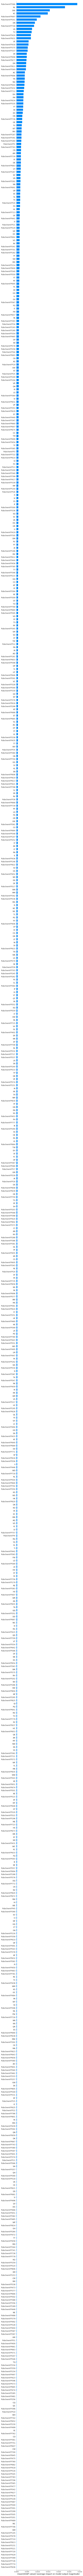

In [30]:
shap.initjs() 
shap.summary_plot(shap_values, X, max_display=826,plot_type="bar")